   time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  str2  \
0   948    2   48  89.8128     0     0      0     100       0    0  ...     0   
1  1002    3   61  49.4424     0     0      0      90       0    1  ...     1   
2   961    3   45  88.4520     0     1      1      90       0    1  ...     1   
3  1166    3   47  85.2768     0     1      0     100       0    1  ...     1   
4  1090    0   43  66.6792     0     1      0     100       0    1  ...     1   

   strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  cid  
0      1        0      1       0   422    477   566    324    0  
1      3        0      1       0   162    218   392    564    1  
2      3        0      1       1   326    274  2063   1893    0  
3      3        0      1       0   287    394  1590    966    0  
4      3        0      0       0   504    353   870    782    0  

[5 rows x 24 columns]


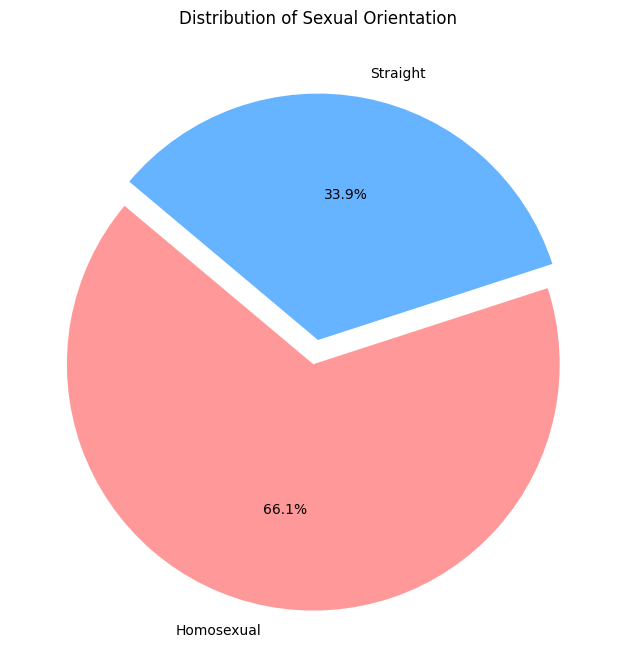

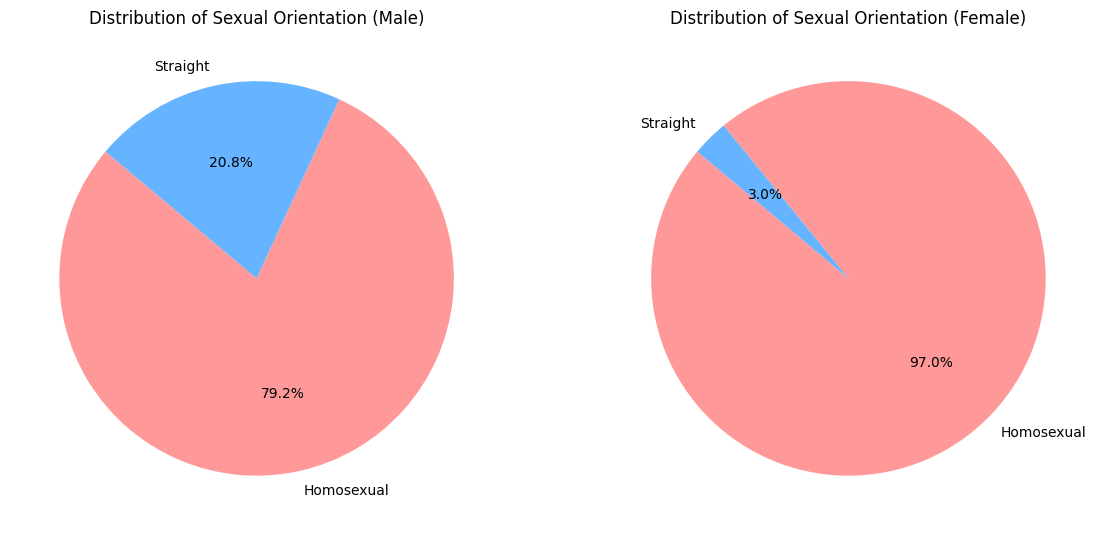

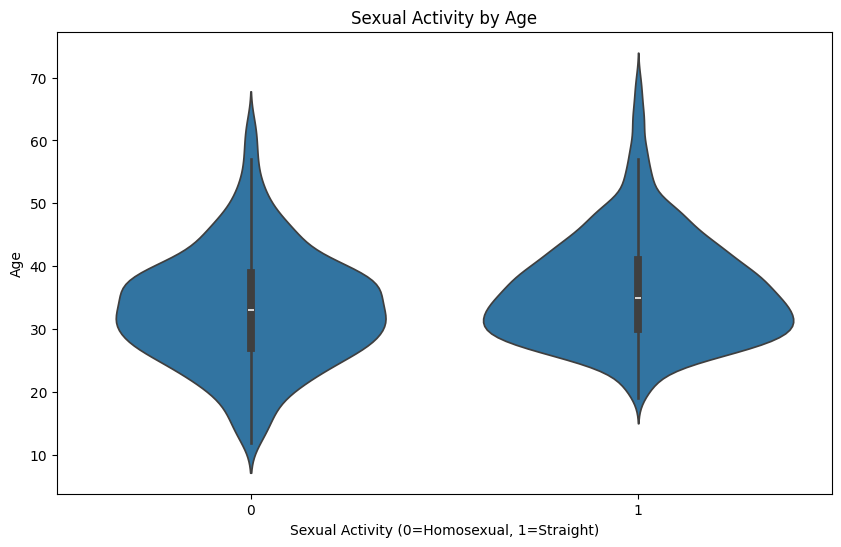

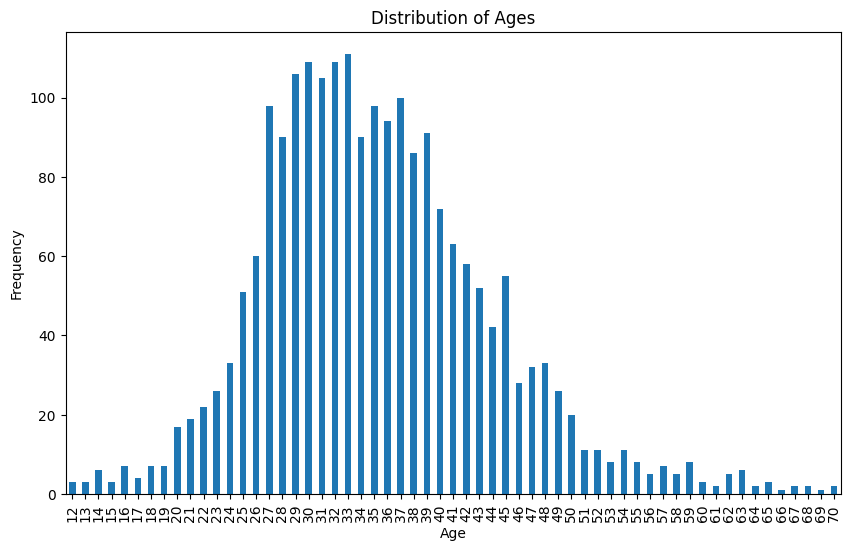

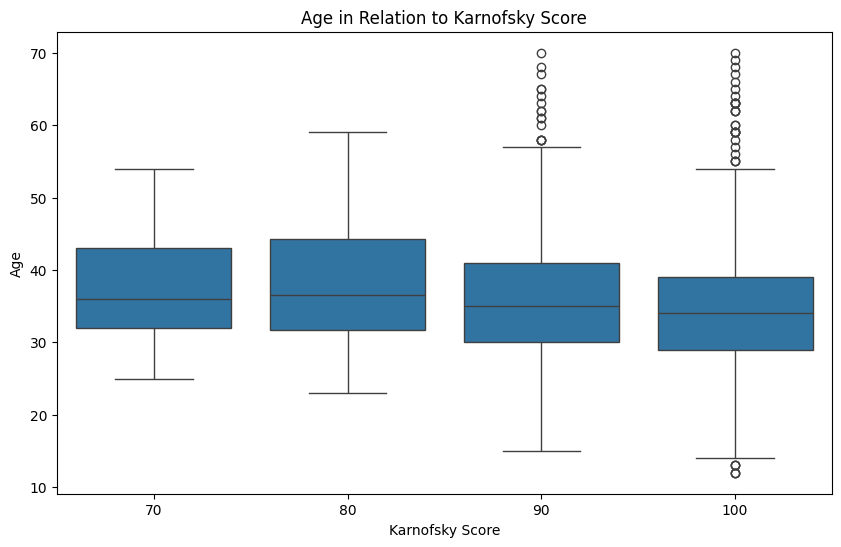

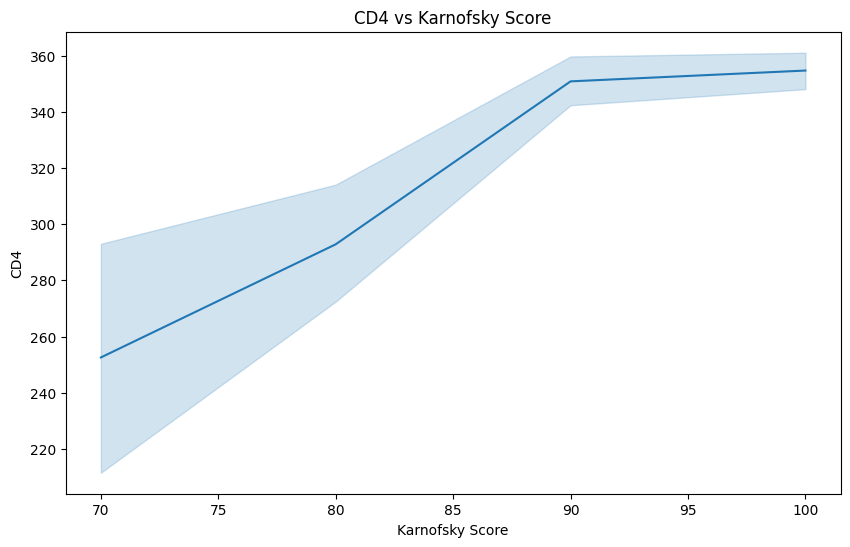

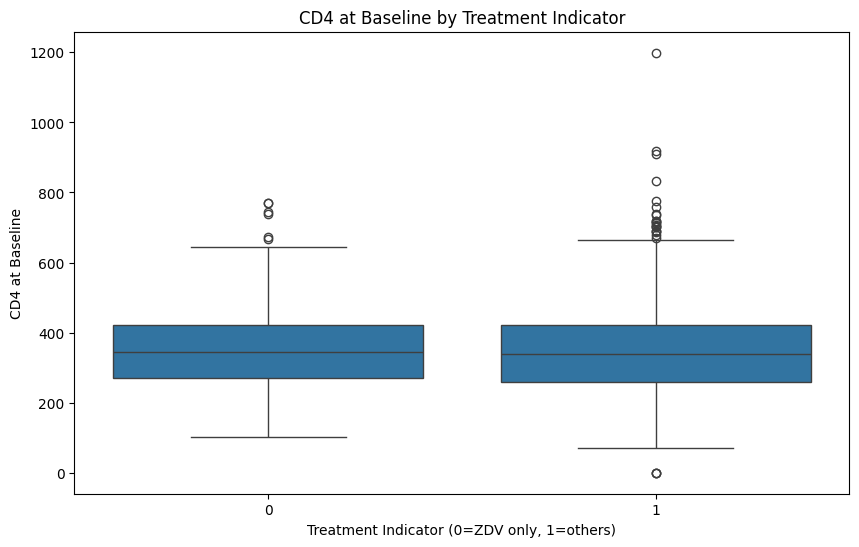

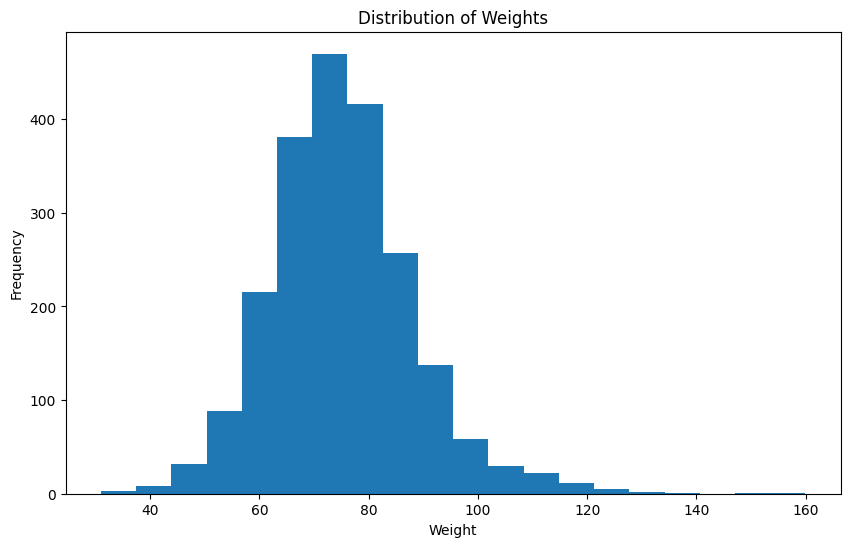

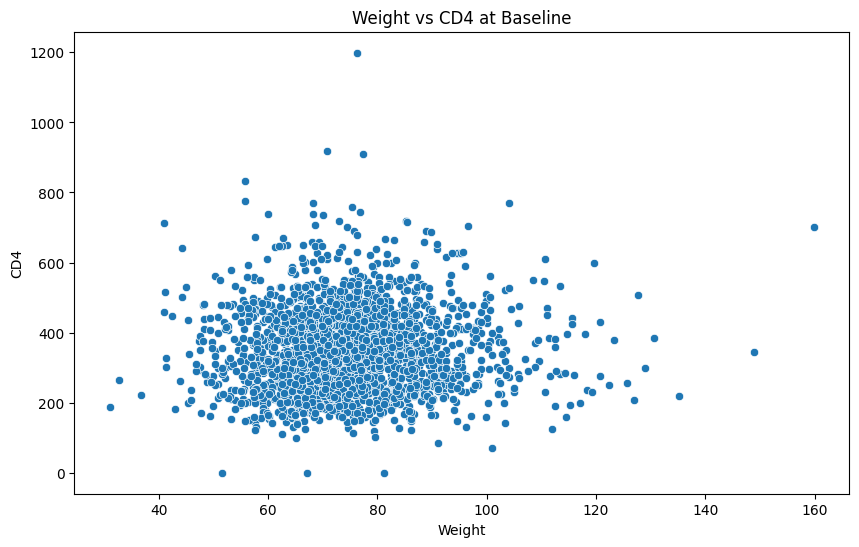

In [26]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890)
X = aids_clinical_trials_group_study_175.data.features
y = aids_clinical_trials_group_study_175.data.targets
data = pd.concat([X, y], axis=1)
print(data.head())

# Pie chart for straight vs homosexual
homo_counts = data['homo'].value_counts()
labels = ['Homosexual', 'Straight']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 
plt.figure(figsize=(8, 8))
plt.pie(homo_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Sexual Orientation')
plt.show()

# Filter data by gender
males = data[data['gender'] == 1]
females = data[data['gender'] == 0]
male_homo_counts = males['homo'].value_counts()
female_homo_counts = females['homo'].value_counts()
labels = ['Homosexual', 'Straight']
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie(male_homo_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Sexual Orientation (Male)')
plt.subplot(1, 2, 2)
plt.pie(female_homo_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Sexual Orientation (Female)')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='homo', y='age', data=data)
plt.title('Sexual Activity by Age')
plt.xlabel('Sexual Activity (0=Homosexual, 1=Straight)')
plt.ylabel('Age')
plt.show()

# Bar graph of ages
plt.figure(figsize=(10, 6))
data['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of age in relation to Karnofsky score
plt.figure(figsize=(10, 6))
sns.boxplot(x='karnof', y='age', data=data)
plt.title('Age in Relation to Karnofsky Score')
plt.xlabel('Karnofsky Score')
plt.ylabel('Age')
plt.show()

# Line plot of CD4 in relation to Karnofsky score
plt.figure(figsize=(10, 6))
sns.lineplot(x='karnof', y='cd40', data=data)
plt.title('CD4 vs Karnofsky Score')
plt.ylabel('CD4')
plt.xlabel('Karnofsky Score')
plt.show()

# Box plot of CD4 at baseline in relation to treatment indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x='treat', y='cd40', data=data)
plt.title('CD4 at Baseline by Treatment Indicator')
plt.xlabel('Treatment Indicator (0=ZDV only, 1=others)')
plt.ylabel('CD4 at Baseline')
plt.show()

# Histogram of wtkgs
plt.figure(figsize=(10, 6))
data['wtkg'].plot(kind='hist', bins=20)
plt.title('Distribution of Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of weight in relation to CD4 at baseline
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wtkg', y='cd40', data=data)
plt.title('Weight vs CD4 at Baseline')
plt.xlabel('Weight')
plt.ylabel('CD4')
plt.show()







